<a href="https://colab.research.google.com/github/DhrubojyotiDey/Tensorflow/blob/main/potato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import zipfile
import numpy as np
import random
import os
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [49]:
os.listdir('.')

['PlantVillage']

In [50]:
print(os.getcwd())



/tmp/potato


In [51]:
local_zip = '/content/drive/MyDrive/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/potato')
zip_ref.close()
print(os.getcwd())


/tmp/potato


In [52]:

# Get the current working directory
current_directory = os.getcwd()
os.chdir('/tmp/potato')

# Get all files in the current working directory
files = [f for f in os.listdir(current_directory) if os.path.isfile(os.path.join(current_directory, f))]

# Print the list of files
print("Files in the current working directory:")
for file in files:
    print(file)
print(current_directory)


Files in the current working directory:
/tmp/potato


In [53]:
import shutil

folder = ['/tmp/potato/PlantVillage/Pepper__bell___healthy',
          '/tmp/potato/PlantVillage/Tomato_Bacterial_spot',
          '/tmp/potato/PlantVillage/Tomato_Early_blight',
          '/tmp/potato/PlantVillage/Tomato_Late_blight',
          '/tmp/potato/PlantVillage/Tomato_Septoria_leaf_spot',
          '/tmp/potato/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite',
          '/tmp/potato/PlantVillage/Tomato__Target_Spot',
          '/tmp/potato/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus',
          '/tmp/potato/PlantVillage/Tomato__Tomato_mosaic_virus',
          '/tmp/potato/PlantVillage/Tomato_healthy',
          '/tmp/potato/PlantVillage/Pepper__bell___Bacterial_spot',
          '/tmp/potato/PlantVillage/Tomato_Leaf_Mold',
]

for i in range(len(folder)):
  shutil.rmtree(folder[i])

In [54]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256, 265),
    batch_size=32,
)

Found 2152 files belonging to 3 classes.


In [55]:
names=dataset.class_names
names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 265, 3)
[0 1 0 0 2 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1]


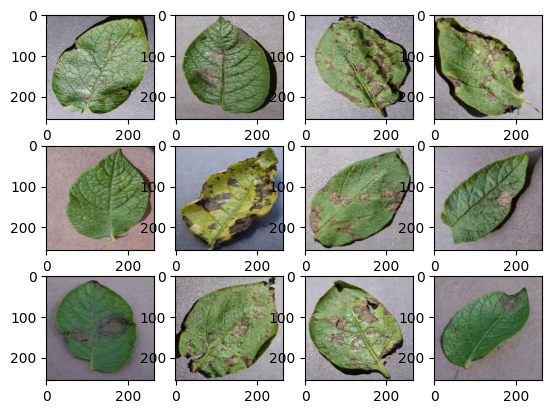

In [56]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))


In [57]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split)==1

    ds_size = len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [58]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [59]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [60]:
resized=tf.keras.Sequential([

    layers.experimental.preprocessing.Resizing(256, 256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [61]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [62]:
input_shape = (32, 256, 256, 3)

n_classes= 3

model= models.Sequential([
    resized,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation= 'relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_8 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_30 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [63]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
history= model.fit(train_ds,
          batch_size=128,
          validation_data=val_ds,
          verbose=1,
          epochs=30)

Epoch 1/30
54/54 [==============================] - 21s 208ms/step - loss: 0.9111 - accuracy: 0.4699 - val_loss: 0.8851 - val_accuracy: 0.4896
Epoch 2/30
54/54 [==============================] - 6s 107ms/step - loss: 0.7964 - accuracy: 0.5521 - val_loss: 0.7998 - val_accuracy: 0.5521
Epoch 3/30
54/54 [==============================] - 6s 108ms/step - loss: 0.6687 - accuracy: 0.6562 - val_loss: 0.4422 - val_accuracy: 0.7760
Epoch 4/30
54/54 [==============================] - 6s 107ms/step - loss: 0.3364 - accuracy: 0.8727 - val_loss: 0.2187 - val_accuracy: 0.9115
Epoch 5/30
54/54 [==============================] - 6s 109ms/step - loss: 0.2070 - accuracy: 0.9253 - val_loss: 0.1056 - val_accuracy: 0.9792
Epoch 6/30
54/54 [==============================] - 6s 106ms/step - loss: 0.1585 - accuracy: 0.9450 - val_loss: 0.1881 - val_accuracy: 0.9167
Epoch 7/30
54/54 [==============================] - 6s 108ms/step - loss: 0.1703 - accuracy: 0.9427 - val_loss: 0.1652 - val_accuracy: 0.9688
Epoch

In [65]:
score=model.evaluate(test_ds)

8/8 [==============================] - 4s 35ms/step - loss: 0.0913 - accuracy: 0.9766


In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

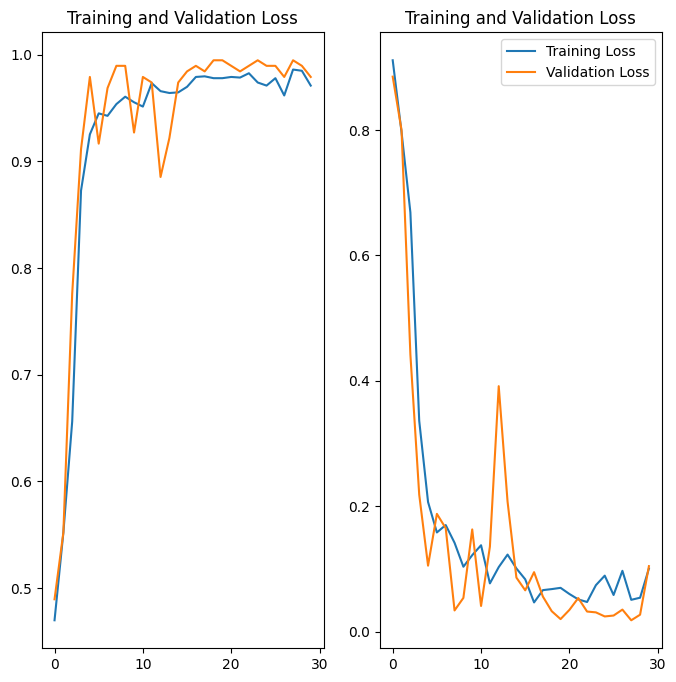

In [67]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label= 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
label: Potato___Late_blight
1/1 [==============================] - 0s 317ms/step
Predicted Label: Potato___Late_blight


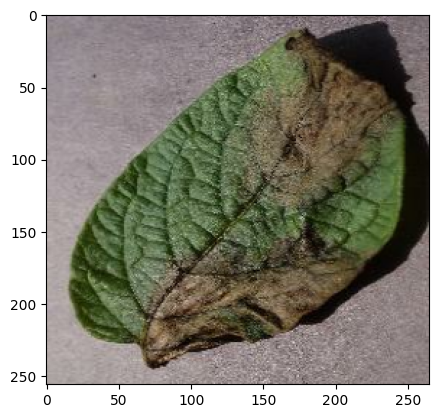

In [68]:
for image_batch, label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("label:",names[label_batch[0].numpy()])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:", names[np.argmax(batch_prediction[0])])

In [77]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])), 2)
  return predicted_class, confidence


1/1 [==============================] - 0s 21ms/step


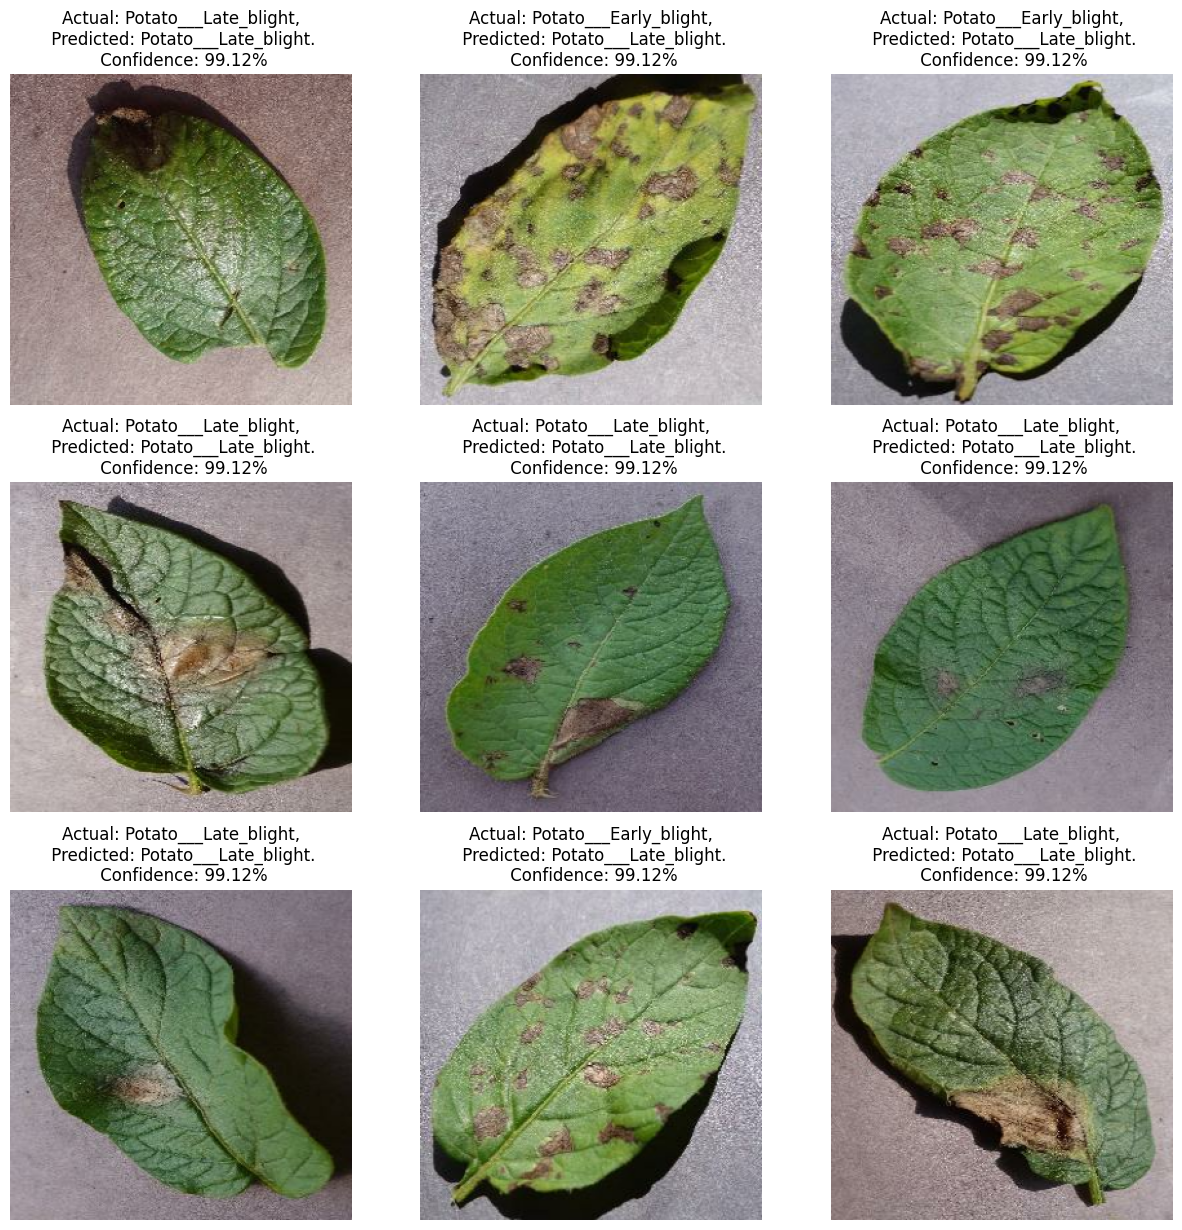

In [80]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for _ in range(9):
    ax = plt.subplot(3, 3, _+1)
    plt.imshow(images[_].numpy().astype('uint8'))
    predicted_class, confidence = predict(model, images[_].numpy())

    actual_class= names[labels[_]]
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")

In [82]:
model_version = 1
model.save(filepath='/content/drive/MyDrive/potato_model')